In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, LSTM

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import pickle
from keras.models import load_model

In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

# Loading and preprocessing the raw data to a .csv file-

In [4]:
# # The data is given in the form of .txt files. Here we convert the data into a .csv file 
# # and save it under the 'train' and 'test' directories for further use. Also the data here is 
# # arranged according to the subject ID. Therefore to break any correlation that may exists 
# # between the datapoints, we shuffle the dataset before dividing it into public and private 
# # datasets to be used in the Neural Network model.
# features = []
# with open("./UCI HAR Dataset/features.txt") as file:
#     for line in file:
#         features.append(line.split()[1])
        
# # Renaming duplicate column names
# names = []
# count = {}
# for feature in features:
#     if(features.count(feature) > 1):
#         names.append(feature)
# for name in names:
#     count[name] = features.count(name)

# for i in range(len(features)):
#     if(features[i] in names):
#         num = count[features[i]]
#         count[features[i]] -= 1;
#         features[i] = str(features[i] + str(num))
        
# train_df = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names= features)
# train_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt",header= None,squeeze=True)
# train_df["activity"] = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
# activity = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)
# label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
# train_df["activity_name"] = label_name
# train_df.head()

In [5]:
# test_df = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace = True, names = features)
# test_df['subject_id'] = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt",header= None,squeeze=True)
# test_df["activity"] = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
# activity = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)
# label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
# test_df["activity_name"] = label_name
# test_df.head()

# Saving train and test data to a resuable .csv file-

In [6]:
# train_df = shuffle(train_df)
# test_df = shuffle(test_df)
# train_df.to_csv("./UCI HAR Dataset/train/train.csv", index = False)
# test_df.to_csv("./UCI HAR Dataset/test/test.csv", index = False)

# Loading the data from the .csv file-

In [7]:
train_df = pd.read_csv('./UCI HAR Dataset/train/train.csv')
test_df = pd.read_csv('./UCI HAR Dataset/test/test.csv')
train_df['activity'] -= 1;
test_df['activity'] -= 1;

y_train = train_df['activity']
X_train = train_df.drop(['activity','activity_name','subject_id'],axis=1)
y_test = test_df['activity']
X_test = test_df.drop(['activity','activity_name','subject_id'],axis=1)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [9]:
# X_train = pd.concat([X_train,X_test], axis = 0)
# y_train = pd.concat([y_train,y_test], axis = 0)

# X_train.shape, y_train.shape

In [68]:
def results(clf, trainX, trainY ,X, y_true): 
    clf.fit(trainX, trainY.values.ravel())
    
    X_test_values = X
    y_predicted = clf.predict(X_test_values)
#     print(classification_report(y_true, y_predicted))

    array = confusion_matrix(y_true, y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
#     plt.figure(figsize = (10,7))
#     sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
   
    recall = metrics.recall_score(y_true, y_predicted, average='macro' )
    precision = metrics.precision_score(y_true, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_true, y_predicted, average="macro") 
    acc = metrics.accuracy_score(y_true, y_predicted)
    
    print('Recall is: ', round(recall,4) * 100)
    print('Precision is:', round(precision, 4)*100)
    print('FScore is:', round(f_score, 4)*100)
    print('Accuracy is: ',round(acc, 4) *100, '\n\n')
    
    
def models(trainX, trainY, testX, testY):
    #SVM
    print('Results of SVM')
    svm = SVC(C = 10, gamma = 0.01, kernel = 'rbf')
    results(svm, trainX, trainY ,testX, testY)
    
    #KNN
    print('Results of KNN')
    knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')
    results(knn, trainX, trainY ,testX, testY)
    
    #RF
    print('Results of RandomForest')
    rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
    results(rf, trainX, trainY ,testX, testY)
    
    

# Dimensionality Reduction

## PCA

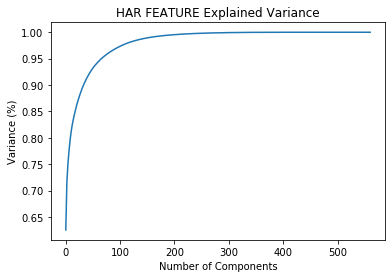

In [11]:
pca = PCA().fit(X_train)
n_pcs= pca.components_.shape[0]


most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]


temp = []
for  i in most_important:
    if i not in temp:
        temp.append(i)
        

most_important = temp

most_important = most_important[:250]



# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('HAR FEATURE Explained Variance')
plt.show()

In [ ]:
# most_important

In [ ]:
# ratio = np.cumsum(pca.explained_variance_ratio_)
# for i in range(len(ratio)):
#     print(i, ratio[i])

In [12]:
X_train_pca = X_train.iloc[:,most_important]
X_test_pca = X_test.iloc[:,most_important]

In [ ]:
# sorted(list(X_train_pca.columns))[::-1]

In [14]:
X_train_pca.shape

(7352, 250)

In [ ]:
with open('most_important_feature.txt', 'w') as file:
    for i in most_important:
        file.writelines([str(i),'\n'])

In [17]:
with open('feature_name.txt', 'w') as file:
    for i in sorted(X_train_pca.columns):
        file.writelines([str(i),'\n'])

In [19]:
for i in sorted(X_train_pca.columns):
    print(i.split('-'))

['angle(X,gravityMean)']
['angle(Y,gravityMean)']
['angle(Z,gravityMean)']
['angle(tBodyAccJerkMean),gravityMean)']
['angle(tBodyAccMean,gravity)']
['angle(tBodyGyroJerkMean,gravityMean)']
['angle(tBodyGyroMean,gravityMean)']
['fBodyAcc', 'bandsEnergy()', '49,561']
['fBodyAcc', 'bandsEnergy()', '57,642']
['fBodyAcc', 'bandsEnergy()', '57,643']
['fBodyAcc', 'bandsEnergy()', '9,162']
['fBodyAcc', 'bandsEnergy()', '9,163']
['fBodyAcc', 'entropy()', 'X']
['fBodyAcc', 'entropy()', 'Y']
['fBodyAcc', 'entropy()', 'Z']
['fBodyAcc', 'iqr()', 'X']
['fBodyAcc', 'iqr()', 'Y']
['fBodyAcc', 'iqr()', 'Z']
['fBodyAcc', 'kurtosis()', 'X']
['fBodyAcc', 'kurtosis()', 'Y']
['fBodyAcc', 'mad()', 'X']
['fBodyAcc', 'mad()', 'Y']
['fBodyAcc', 'mad()', 'Z']
['fBodyAcc', 'maxInds', 'X']
['fBodyAcc', 'maxInds', 'Y']
['fBodyAcc', 'maxInds', 'Z']
['fBodyAcc', 'meanFreq()', 'X']
['fBodyAcc', 'meanFreq()', 'Y']
['fBodyAcc', 'meanFreq()', 'Z']
['fBodyAcc', 'min()', 'X']
['fBodyAcc', 'min()', 'Y']
['fBodyAcc', 'min()'

In [ ]:
# len(set(most_important))

### Models

In [69]:
models(X_train_pca, y_train ,X_test_pca, y_test)

Results of SVM
Recall is:  96.37
Precision is: 96.55
FScore is: 96.43
Accuracy is:  96.47 


Results of KNN
Recall is:  90.52
Precision is: 91.66
FScore is: 90.72
Accuracy is:  90.94 


Results of RandomForest
Recall is:  93.84
Precision is: 94.22
FScore is: 93.95
Accuracy is:  94.16 




In [23]:
# svc_param_selection(X_train_pca, y_train, 5)

# import pickle
# import sys

# p = pickle.dumps(svm)
# print(sys.getsizeof(p))

In [25]:
# knn_param_selection(X_train_pca, y_train, 5)
# rf_param_selection(X_train_pca, y_train, 5)

## PCA + LDA

In [58]:
lda = LDA(n_components=None)

lda = lda.fit(X_train_pca, y_train.values.ravel())

X_train_lda = lda.transform(X_train_pca)   
X_test_lda = lda.transform(X_test_pca) 


In [59]:
print(lda.scalings_)

[[ -4.35240775   2.54733401  -0.6199547    0.49377758  -1.05078984]
 [ -0.92897013   0.35538024   0.50188739  -0.52695171   0.30753107]
 [ -3.14920824  -6.73599221  -0.09718964   0.49466249  -0.17864197]
 ...
 [  0.25321587  -0.57113187   0.72112227   0.88113032   1.45675255]
 [  7.95888673  -6.31690628  -8.54036218 -24.04631337   0.70510246]
 [ -7.22229276   1.15996055   0.0868063   -2.85422491   0.25439675]]


In [60]:
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.68110349, 0.22268272, 0.0530429 , 0.03169619, 0.0114747 ])

In [61]:
X_train_lda.shape

(7352, 5)

### Models

In [70]:
#SVM

models(X_train_lda, y_train, X_test_lda, y_test)

Results of SVM
Recall is:  95.39999999999999
Precision is: 95.76
FScore is: 95.50999999999999
Accuracy is:  95.52000000000001 


Results of KNN
Recall is:  95.6
Precision is: 95.89999999999999
FScore is: 95.69
Accuracy is:  95.69 


Results of RandomForest
Recall is:  95.54
Precision is: 95.82000000000001
FScore is: 95.63000000000001
Accuracy is:  95.62 




# LDA

In [50]:
l = LDA().fit(X_train, y_train)


X_train_l = l.transform(X_train)   
X_test_l = l.transform(X_test) 

X_train_l.shape

In [71]:
models(X_train_l, y_train, X_test_l, y_test)

Results of SVM
Recall is:  96.28
Precision is: 96.52
FScore is: 96.35000000000001
Accuracy is:  96.3 


Results of KNN
Recall is:  96.17999999999999
Precision is: 96.46000000000001
FScore is: 96.25
Accuracy is:  96.2 


Results of RandomForest
Recall is:  96.24000000000001
Precision is: 96.53
FScore is: 96.32
Accuracy is:  96.27 




# TRANSFER LEARNING

In [29]:
def Model(X, y, n):
    X, y = np.array(X), np.array(y)

    model = CREATE_MODEL(X.shape[1])
    print(model.summary())


    model = COMPILE(model)
    history, model = FIT(model, X, y, n)

    PLOT(history, n)

    print(history.history['accuracy'])
    print(max(history.history['accuracy']))
    
    return model


def data(X, Y, path):
#     path = 'Real-Time'
    
    test_x = pd.read_csv('{0}/{1}'.format(path, X))
    test_y = pd.read_csv('{0}/{1}'.format(path, Y))
    
    names = test_x.columns

    scaler = MinMaxScaler(feature_range = [-1,1])
    test_x  = scaler.fit_transform(test_x)
        
    return pd.DataFrame(test_x, columns = names), np.array(test_y)



def check(clf, X, y, X_test, y_test):
    clf.fit(X, y.ravel())
        
    y_predicted = clf.predict(X_test)
    
    recall = metrics.recall_score(y_test, y_predicted, average='macro' )
    precision = metrics.precision_score(y_test, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_test, y_predicted, average="macro") 
    acc = metrics.accuracy_score(y_test, y_predicted)

    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', acc)
    
    array = confusion_matrix(y_test,y_predicted)
    
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
    return acc
    
    
    
def saveModel(filename, model): 
    filename = 'Models/{0}.sav'.format(filename)
    pickle.dump(model, open(filename, 'wb'))

# CNN

In [30]:
# #PCA
X_train_cnn = np.reshape(X_train_pca.values, (X_train_pca.values.shape[0], 1, X_train_pca.values.shape[1]))
X_test_cnn = np.reshape(X_test_pca.values, (X_test_pca.values.shape[0], 1, X_test_pca.values.shape[1]))

#LDA

# X_train_cnn = np.reshape(X_train_lda, (X_train_lda.shape[0], 1, X_train_lda.shape[1]))
# X_test_cnn = np.reshape(X_test_lda, (X_test_lda.shape[0], 1, X_test_lda.shape[1]))


#BASE DATASET
# X_train_cnn = np.reshape(X_train.values, (X_train.values.shape[0], 1, X_train.values.shape[1]))
# X_test_cnn = np.reshape(X_test.values, (X_test.values.shape[0], 1, X_test.values.shape[1]))

In [31]:
X_train_cnn.shape

(7352, 1, 250)

In [65]:
from tensorflow.keras.layers import Conv1D ,BatchNormalization, Activation,MaxPooling1D


def CNN_MODEL_TRANSFER():
    verbose, epochs, batch_size = 0, 40, 32
    
    model = Sequential()
    
    model.add(Conv1D(64, 3, padding='same',  input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2] )))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    print(model.summary())
    
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
     
    history = model.fit(
    X_train_cnn,
    y_train.values,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model_cnn.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )

    print(max(history.history['accuracy']))

    return model
 
model_cnn = CNN_MODEL_TRANSFER()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 64)             48064     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 64)             12352     
_________________________________________________________________
activation_3 (Activation)    (None, 1, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# 1 Scenario

In [33]:
model_cnn_1 = tf.keras.models.load_model('model_cnn.h5')
# model_cnn_1 = tf.keras.models.load_model('Models/PCA/model_cnn.h5')

# model_cnn_1 = model_cnn
model_cnn_1.pop()
model_cnn_1.trainable = False

model_cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 64)             48064     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 64)             12352     
_________________________________________________________________
activation_3 (Activation)    (None, 1, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# 2 Scenario 

In [ ]:
# model_cnn = tf.keras.models.load_model('model_cnn_90.h5')
model_cnn_2 = tf.keras.models.load_model('Models/PCA/model_cnn.h5')

# model_cnn_1 = model_cnn
model_cnn_2.pop()
model_cnn_2.pop()
model_cnn_2.trainable = False

model_cnn_2.summary()

# Real-Time Data test

In [87]:
# X_test_real, y_test_real = data('X.csv', 'Y.csv', 'Real-Time')
X, y = data('X.csv', 'Y.csv', 'Real-time_v2')
y -= 1

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X, y, test_size=0.1, random_state=42)



# CNN + PCA
X_train_real = X_train_real.iloc[:,most_important]
X_test_real = X_test_real.iloc[:,most_important]


# CNN + (PCA + LDA)
# X_train_real = lda.transform(X_train_real.iloc[:,most_important])
# X_test_real = lda.transform(X_test_real.iloc[:,most_important])


# CNN Base Model  !! Comment PCA and PCA+LDA part
X_train_real = np.reshape(X_train_real.values, (X_train_real.values.shape[0], 1, X_train_real.values.shape[1]))
X_test_real = np.reshape(X_test_real.values, (X_test_real.values.shape[0], 1, X_test_real.values.shape[1]))


# 1 Scenario 
X_train_real = model_cnn_1.predict(X_train_real)
X_test_real = model_cnn_1.predict(X_test_real)

# 2 Scenario 
# X_train_real = model_cnn_2.predict(X_train_real)
# X_test_real = model_cnn_2.predict(X_test_real)



X_train_real.shape, X_test_real.shape, y_train_real.shape, y_test_real.shape

((252, 64), (28, 64), (252, 1), (28, 1))

# SVM

83.57 Recall
88.17 pre
83.3 fscore
Accuracy is:  0.8571428571428571


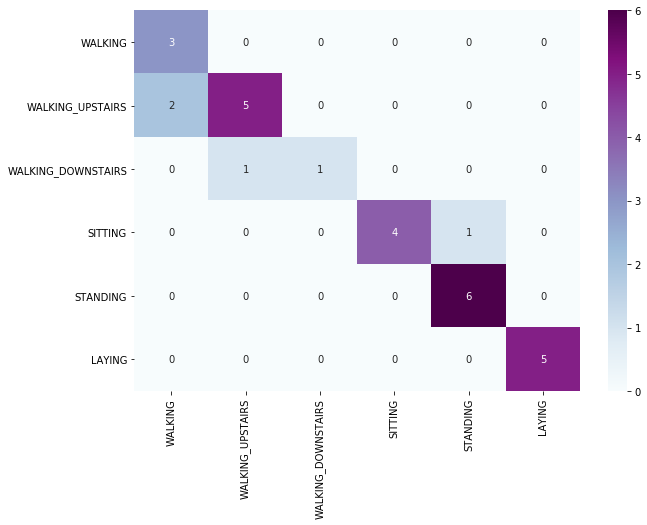

In [88]:
svm = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
acc_svm = check(svm, X_train_real, y_train_real, X_test_real, y_test_real)

In [95]:
name = 'PCA'
saveModel('{0}/svm_{1}_{2}'.format(name, name, str( round(acc_svm, 3) )), svm)

95.24000000000001 Recall
93.33 pre
93.06 fscore
Accuracy is:  0.9285714285714286


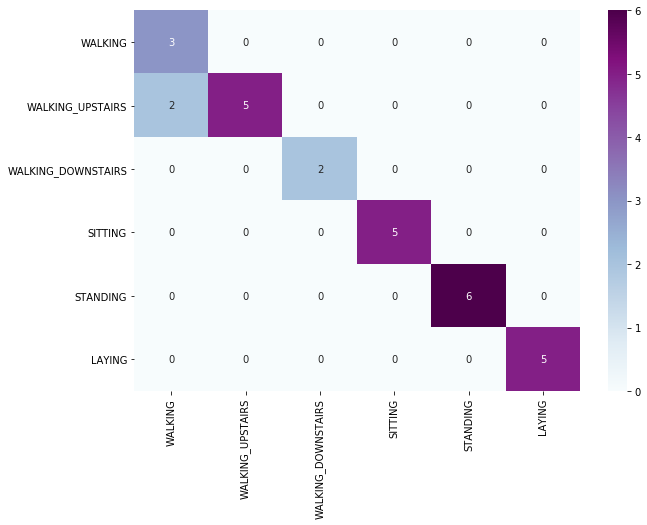

In [94]:
svm = SVC(C = 0.001, gamma = 1, kernel= 'poly')
acc_svm = check(svm, X_train_real, y_train_real, X_test_real, y_test_real)

# saveModel('BASE/svm_LDA_68.1', svm)

In [ ]:
def svc_param_selection(X_train_real, y_train_real, nfolds):

    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1], 
                  'gamma' : [0.01, 0.1, 1], 
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }


    grid_search = GridSearchCV( SVC(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1) # use all processor
    grid_search.fit(X, y.ravel())

    return grid_search.best_params_

svc_param_selection(X_train_real, y_train_real, 5)

# KNN

86.9 Recall
90.56 pre
86.42999999999999 fscore
Accuracy is:  0.8928571428571429


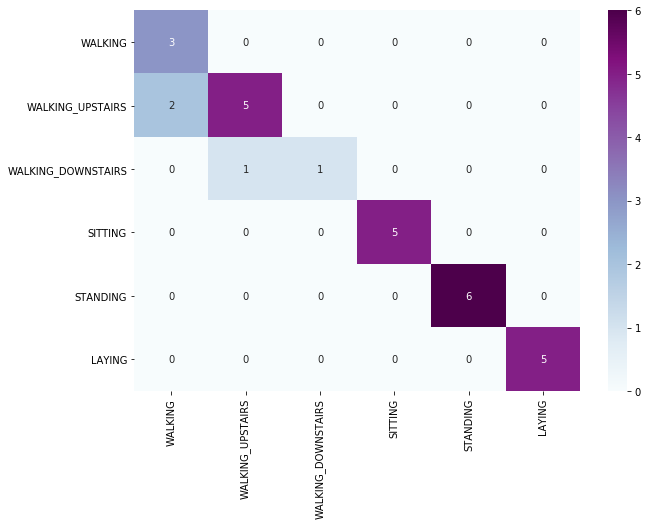

In [91]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 5, weights = 'distance')
acc_knn = check(knn, X_train_real, y_train_real, X_test_real, y_test_real)

In [ ]:
# saveModel('{0}/knn_{1}_{2}'.format(name, name, str( round(acc_knn, 3) )), knn)

In [ ]:
def knn_param_selection(X, y, nfolds):

    param_grid = {'n_neighbors' : [3,5,7,11,13,15,19,21],
                'weights' : ['uniform', 'distance'], 
                'metric' : ['euclidean','manhattan'] }

    grid_search = GridSearchCV(KNeighborsClassifier(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1)

    grid_search.fit(X,y)

    return grid_search.best_params_
                  
# knn_param_selection(X, y.ravel(), 5)

# Random Forest

83.57 Recall
88.17 pre
83.3 fscore
Accuracy is:  0.8571428571428571


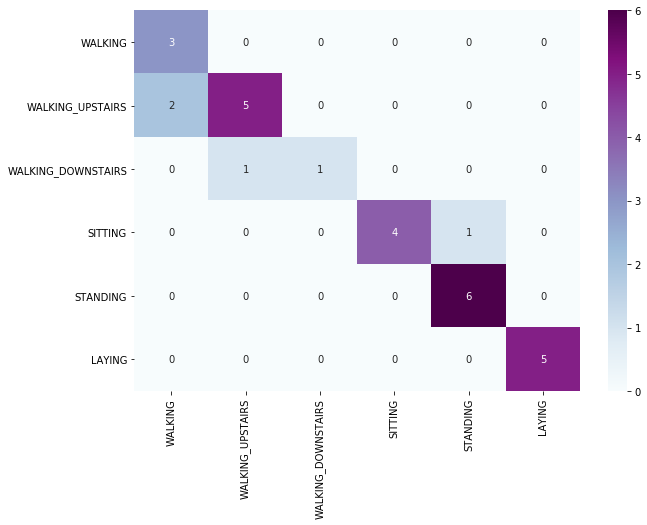

In [92]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 30)
acc_rf = check(rf, X_train_real, y_train_real, X_test_real, y_test_real)

In [ ]:
# saveModel('{0}/rf_{1}_{2}'.format(name, name, str( round(acc_rf, 3) )), rf)

77.46 Recall
81.63 pre
77.03 fscore
Accuracy is:  0.7857142857142857


0.7857142857142857

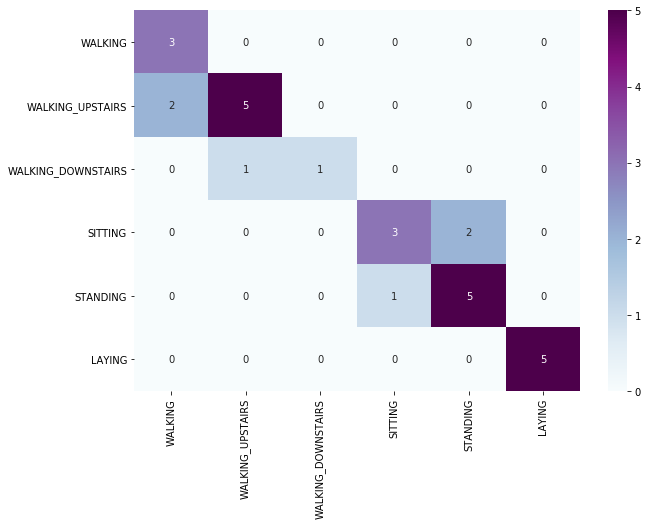

In [93]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 40)
check(rf, X_train_real, y_train_real, X_test_real, y_test_real)

In [ ]:
def rf_param_selection(X, y, nfolds):
    param_grid = {'n_estimators': [40, 50, 150],
                'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                'min_samples_split': [4, 6,8, 10]}

    grid_search = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv = nfolds,
                             n_jobs = -1)
    grid_search.fit(X, y)

    return grid_search.best_params_

# knn_param_selection(X, y.ravel(), 5)

# rf_param_selection(X, y.ravel(), 5)

# LSTM

In [ ]:
X_train_lstm = np.reshape(X_train_real, (X_train_real.shape[0], 1, X_train_real.shape[1]))
X_test_lstm = np.reshape(X_test_real, (X_test_real.shape[0], 1, X_test_real.shape[1]))

In [ ]:
X_train_lstm.shape

In [ ]:
def LSTM_Model(trainX, trainY, testX, testY):
    n_steps = 64
    n_feature = 1
    verbose, epochs, batch_size = 0, 50, 64

    lstm = Sequential()
    lstm.add(LSTM(units= trainX.shape[0], input_shape=(n_feature, n_steps) ))
    lstm.add(Dense(128, activation='relu'))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(64, activation='relu'))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(32, activation='relu'))
    lstm.add(Dense(6, activation='softmax'))

    print(lstm.summary())

    lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    lstm.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)


    _, accuracy = lstm.evaluate(testX, testY, batch_size=batch_size, verbose=0)
    
    y_pred = lstm.predict(testX)
    y_pred = np.argmax(y_pred,axis=1)
    
    recall = metrics.recall_score(testY, y_pred, average='macro' )
    precision = metrics.precision_score(testY, y_pred, average='macro' )
    f_score = metrics.f1_score(testY, y_pred, average="macro") 

    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print('Accuracy is: ', metrics.accuracy_score(testY, y_pred))
    
    array = confusion_matrix(testY, y_pred)
    
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')

    return accuracy, lstm


In [ ]:
accuracy, lstm = LSTM_Model(X_train_lstm, y_train_real, X_test_lstm, y_test_real )

In [ ]:
from keras.models import load_model

lstm.save('Models/{0}/lstm_{1}_{2}.h5'.format(name,name,str(round(accuracy,3) )))


# Deep Neural Network

In [ ]:
# Variables-
epochs = 30
# batch_size = 64
batch_size = 16
num_classes = 6
fig_size = (9,7)

In [ ]:
def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

def COMPILE(model):
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model;
    
def FIT(model,X,y,i):
    history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history,model

def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
# model = Model(X_train, y_train, 4)

# X_test, y_test = np.array(X_test), np.array(y_test)

# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred,axis=1)

# print('Accuracy is: ',metrics.accuracy_score(y_pred, y_test))

# CONFUSION_MATRIX(y_test,y_pred)


# model.pop()
# model = tf.keras.models.load_model('Models/Base/model_4.h5')
# model.pop()
# model.trainable = False

# model.summary()

In [ ]:
# X_test_real, y_test_real = data('X.csv', 'Y.csv', 'Real-Time')
X, y = data('X.csv', 'Y.csv', 'Real-time_v1')
y -= 1

print(X.describe())

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X, y, test_size=0.33, random_state=42)


#BASE MODEL
# X_train_real = model.predict(X_train_real.values)
# X_test_real = model.predict(X_test_real.values)

# PCA
# X_train_real = X_train_real.iloc[:,most_important]
# X_test_real = X_test_real.iloc[:,most_important]

# X_train_real = model_dimension.predict(X_train_real.values)
# X_test_real = model_dimension.predict(X_test_real.values)

# #LDA
# X_train_real = lda.transform(X_train_real.iloc[:,most_important])
# X_test_real = lda.transform(X_test_real.iloc[:,most_important])

# X_train_real = model_lda.predict(X_train_real)
# X_test_real = model_lda.predict(X_test_real)



#CNN Base Model
# X_train_real = np.reshape(X_train_real.values, (X_train_real.values.shape[0], 1, X_train_real.values.shape[1]))
# X_test_real = np.reshape(X_test_real.values, (X_test_real.values.shape[0], 1, X_test_real.values.shape[1]))

# X_train_real = model_cnn.predict(X_train_real)
# X_test_real = model_cnn.predict(X_test_real)


# CNN + PCA
X_train_real = X_train_real.iloc[:,most_important]
X_test_real = X_test_real.iloc[:,most_important]

X_train_real = np.reshape(X_train_real.values, (X_train_real.values.shape[0], 1, X_train_real.values.shape[1]))
X_test_real = np.reshape(X_test_real.values, (X_test_real.values.shape[0], 1, X_test_real.values.shape[1] ))

X_train_real = model_cnn.predict(X_train_real)
X_test_real = model_cnn.predict(X_test_real)



# CNN + LDA
# X_train_real = lda.transform(X_train_real.iloc[:,most_important])
# X_test_real = lda.transform(X_test_real.iloc[:,most_important])

# X_train_real = np.reshape(X_train_real, (X_train_real.shape[0], 1, X_train_real.shape[1]))
# X_test_real = np.reshape(X_test_real, (X_test_real.shape[0], 1, X_test_real.shape[1]))

# X_train_real = model_cnn.predict(X_train_real)
# X_test_real = model_cnn.predict(X_test_real)





X_train_real.shape, X_test_real.shape, y_train_real.shape, y_test_real.shape

In [ ]:
# def PCA_MODEL_TRANSFER():
#     model_dimension = Sequential()
#     model_dimension.add(Input(shape = X_train_pca.shape[1],))
#     model_dimension.add(Dense(128,activation='relu'))
#     model_dimension.add(Dropout(0.2))
#     model_dimension.add(Dense(64,activation='relu'))
#     # model_dimension.add(Dropout(0.5))
#     # model_dimension.add(Dense(32,activation='relu'))
#     model_dimension.add(Dense(num_classes,activation='softmax')) 


#     model_dimension.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
#     )

#     history = model_dimension.fit(
#     X_train_pca,
#     y_train,
#     validation_split=0.2,
#     batch_size=batch_size,
#     epochs=epochs,
#     callbacks=[
#         tf.keras.callbacks.ModelCheckpoint(f'./model_{10}.h5', save_best_only=True),
#         tf.keras.callbacks.ReduceLROnPlateau(
#             monitor='val_loss',
#             factor=0.1,
#             patience=1
#         )
#     ],
#     verbose=0
#     )

#     PLOT(history, 10)

#     print(history.history['accuracy'])
#     print(max(history.history['accuracy']))

#     return model_dimension

# model_dimension = PCA_MODEL_TRANSFER()


# model_dimension = tf.keras.models.load_model('PCA/base_model.h5')
# # model_dimension = tf.keras.models.load_model('model_10.h5')
# model_dimension.summary()

# model_dimension.count_params()


# model_dimension = tf.keras.models.load_model('PCA/base_model.h5')
# # model_dimension = tf.keras.models.load_model('model_10.h5')

# model_dimension.summary()
# model_dimension.pop()
# model_dimension.trainable = False

# model_dimension.summary()

In [ ]:
# def LDA_MODEL_TRANSFER(trainX, trainY):
#     model = Sequential()
#     model.add(Input(shape = trainX.shape[1],))
#     model.add(Dense(12,activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(16,activation='relu'))
# #     model_dimension.add(Dropout(0.5))
# #     model_dimension.add(Dense(32,activation='relu'))
#     model.add(Dense(num_classes,activation='softmax')) 


#     model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
#     )

#     history = model.fit(
#     trainX,
#     trainY,
#     validation_split=0.2,
#     batch_size=batch_size,
#     epochs=epochs,
#     callbacks=[
#         tf.keras.callbacks.ModelCheckpoint(f'./model_{12}.h5', save_best_only=True),
#         tf.keras.callbacks.ReduceLROnPlateau(
#             monitor='val_loss',
#             factor=0.1,
#             patience=1
#         )
#     ],
#     verbose=0
#     )

#     PLOT(history, 10)

#     print(history.history['accuracy'])
#     print(max(history.history['accuracy']))

#     return model

# # model_lda = LDA_MODEL_TRANSFER(pd.DataFrame(X_train_lda), y_train)

# model_lda = tf.keras.models.load_model('model_12.h5')


# model_lda.pop()
# model_lda.trainable = False

# model_lda.summary()

In [ ]:
X_train_test = model.predict(X_train)
X_test_test = model.predict(X_test)

X_train_test = np.reshape(X_train_test, (X_train_test.shape[0], 1, X_train_test.shape[1]))
X_test_test = np.reshape(X_test_test, (X_test_test.shape[0], 1, X_test_test.shape[1]))

In [ ]:
LSTM_Model(X_train, y_train, X_test, y_test)

# CNN

In [ ]:
cnn = Model(X_train_real, y_train_real, 5)




y_pred = cnn.predict(X_test_real)
y_pred = np.argmax(y_pred,axis=1)

recall = metrics.recall_score(y_test_real, y_pred, average='macro' )
precision = metrics.precision_score(y_test_real, y_pred, average='macro' )
f_score = metrics.f1_score(y_test_real, y_pred, average="macro") 

print(round(recall,4) * 100, 'Recall')
print(round(precision, 4)*100, 'pre')
print(round(f_score, 4)*100, "fscore")
print('Accuracy is: ', metrics.accuracy_score(y_test_real, y_pred))

# Feature extracted by my Code

In [ ]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")

X_train_fex = scaler.fit_transform(X_train_fex)
X_test_fex  = scaler.fit_transform(X_test_fex)

X_train_fex = pd.DataFrame(X_train_fex)
X_test_fex = pd.DataFrame(X_test_fex)

print(X_train_fex.shape, X_test_fex.shape)


y_train_fex = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]
y_test_fex = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

print(y_train.shape, y_test.shape)


y_train_fex -= 1
y_test_fex -= 1

In [ ]:
model_extracted = Model(X_train_fex, y_train_fex, 5)

In [ ]:
model_extracted.pop()
model_extracted.trainable = True

model_extracted.summary()

In [ ]:
X, y = data('X.csv', 'Y.csv', 'Real-time_v1')
X = model_extracted.predict(X)

svm = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
check(svm, X, y, X, y)

# Model replica number-1 

In [ ]:
# MODEL REPLICA NO.1
X_train_1 = X_train[0:2500]
y_train_1 = y_train[0:2500]

In [ ]:
X_train_1, y_train_1 = PREPROCESS(X_train_1,y_train_1);

In [ ]:
model_1 = CREATE_MODEL(X_train_1.shape[1]);
model_1.summary()

In [ ]:
model_1 = COMPILE(model_1)
history_1,model_1 = FIT(model_1,X_train_1,y_train_1,1)

In [ ]:
PLOT(history_1,1)

# Model replica number-2

In [ ]:
# MODEL REPLICA NO.2
X_train_2 = X_train[2500:5000]
y_train_2 = y_train[2500:5000]

In [ ]:
X_train_2, y_train_2 = PREPROCESS(X_train_2,y_train_2)

In [ ]:
model_2 = CREATE_MODEL(X_train_2.shape[1])
model_2.summary()

In [ ]:
model_2 = COMPILE(model_2)
history_2,model_2 = FIT(model_2,X_train_2,y_train_2,2);

In [ ]:
PLOT(history_2,2);

# Model replica number-3

In [ ]:
# MODEL REPLICA NO.3
X_train_3 = X_train[5000:-1]
y_train_3 = y_train[5000:-1]

In [ ]:
X_train_3, y_train_3 = PREPROCESS(X_train_3,y_train_3)

In [ ]:
model_3 = CREATE_MODEL(X_train_3.shape[1])
model_3.summary()

In [ ]:
model_3 = COMPILE(model_3);
history_3, model_3 = FIT(model_3,X_train_3,y_train_3,3)

In [ ]:
PLOT(history_3,3)

# The global model

In [ ]:
model_g = CREATE_MODEL(X_test.shape[1])
model_g.summary()

In [ ]:
all_models = []
LOAD_MODELS()

In [ ]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy'])]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(3):
    if(weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.03
        break
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)

In [ ]:
model_g.set_weights(avg_model_weights)
model_g = COMPILE(model_g)
_ , accuracy = model_g.evaluate(X_test,y_test,verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

In [ ]:
y_pred = model_g.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
CONFUSION_MATRIX(y_test,y_pred)

In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv('PCA/most_important_feature.txt', header = None)
test[0].values